# Student Performance Indicator

### *Project's Life Cycle:*
*- Problem Statement* <br>
*- Data Collection*  <br>
*- Data Checks to perform*  <br>
*- Exploratory Data Analysis (EDA)*  <br>
*- Data Pre-processing* <br>
*- Model Training* <br>
*- Best Model Recommendation* <br>

### **1) Problem Statement**

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch, and Test Preparation course.

### **2) Data Collection**

- Dataset Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Our data consists of 1000 rows and 8 columns.

In [37]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Data
student_data = pd.read_csv("data/stud.csv")
print(student_data.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


### **3) Data Checks to perform**

- Missing Values
- Duplicates
- Data type
- Unique values of each column
- Statistics of dataset
- Category names

In [39]:
# Missing values
print("\nMissing values in each column:")
print(student_data.isnull().sum())
if student_data.isnull().sum().any() == False:
    print("No missing values found in the dataset.")


Missing values in each column:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64
No missing values found in the dataset.


In [40]:
# Duplicates
print("\nThere are {} duplicate rows in the dataset.".format(student_data.duplicated().sum()))
if student_data.duplicated().sum() > 0:
    student_data = student_data.drop_duplicates()
    print("Duplicates have been removed from dataset.")


There are 0 duplicate rows in the dataset.


In [41]:
# Data types and Nulls
print("\nData types and null values in each column:")
print(student_data.info())


Data types and null values in each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [42]:
# Unique Values per Column
print("\nUnique values per column:")
for column in student_data.columns:
    unique_values = student_data[column].nunique()
    print(f"{column}: {unique_values}")


Unique values per column:
gender: 2
race_ethnicity: 5
parental_level_of_education: 6
lunch: 2
test_preparation_course: 2
math_score: 81
reading_score: 72
writing_score: 77


In [43]:
# Statistical Summary and insights
# Numerical information
numeric_cols = list(student_data.select_dtypes(include=['int64']).columns)
print(f"The dataset provides a glimpse into the academic performance of the students, including {numeric_cols}.\n")
print(student_data[numeric_cols].describe())

The dataset provides a glimpse into the academic performance of the students, including ['math_score', 'reading_score', 'writing_score'].

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


#### Insight
- The mean scores across all 3 exams are roughly equal.
- Student scored as low as 0 in Maths while relatively higher in literacy skills. 

In [44]:
# Categorical features
print(f"The student body consists of {student_data['gender'].unique()} students.")
print(f"Ethnicity-wise, they belong to {student_data['race_ethnicity'].unique()}.")
print(f"Their parents graduated with {student_data['parental_level_of_education'].unique()}.")
print(f"Students have lunch options of {student_data['lunch'].unique()}")
print(f"Their test preparation course status either {student_data['test_preparation_course'].unique()} before exams.")

The student body consists of ['female' 'male'] students.
Ethnicity-wise, they belong to ['group B' 'group C' 'group A' 'group D' 'group E'].
Their parents graduated with ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'].
Students have lunch options of ['standard' 'free/reduced']
Their test preparation course status either ['none' 'completed'] before exams.


In [45]:
# Feature Engineering more attributes - Total Score and Average Score
student_data['total_score'] = student_data['math_score'] + student_data['reading_score'] + student_data['writing_score']
student_data['average_score'] = student_data['total_score'] / 3

# Detailed score analysis
# Students with perfect scores
math_perfect = student_data[student_data['math_score'] == 100].shape[0]
reading_perfect = student_data[student_data['reading_score'] == 100].shape[0]
writing_perfect = student_data[student_data['writing_score'] == 100].shape[0]
print(f"\nNumber of students with perfect scores:")
print(f"Math: {math_perfect}, Reading: {reading_perfect}, Writing: {writing_perfect}")
# Students with scores <20
math_below_20 = student_data[student_data['math_score'] < 20].shape[0]
reading_below_20 = student_data[student_data['reading_score'] < 20].shape[0]
writing_below_20 = student_data[student_data['writing_score'] < 20].shape[0]
print(f"\nNumber of students with scores below 20:")
print(f"Math: {math_below_20}, Reading: {reading_below_20}, Writing: {writing_below_20}")


Number of students with perfect scores:
Math: 7, Reading: 17, Writing: 14

Number of students with scores below 20:
Math: 4, Reading: 1, Writing: 3


### **4) Exploratory Data Analysis**

#### 4.1 Average and Total Scores Distribution by gender

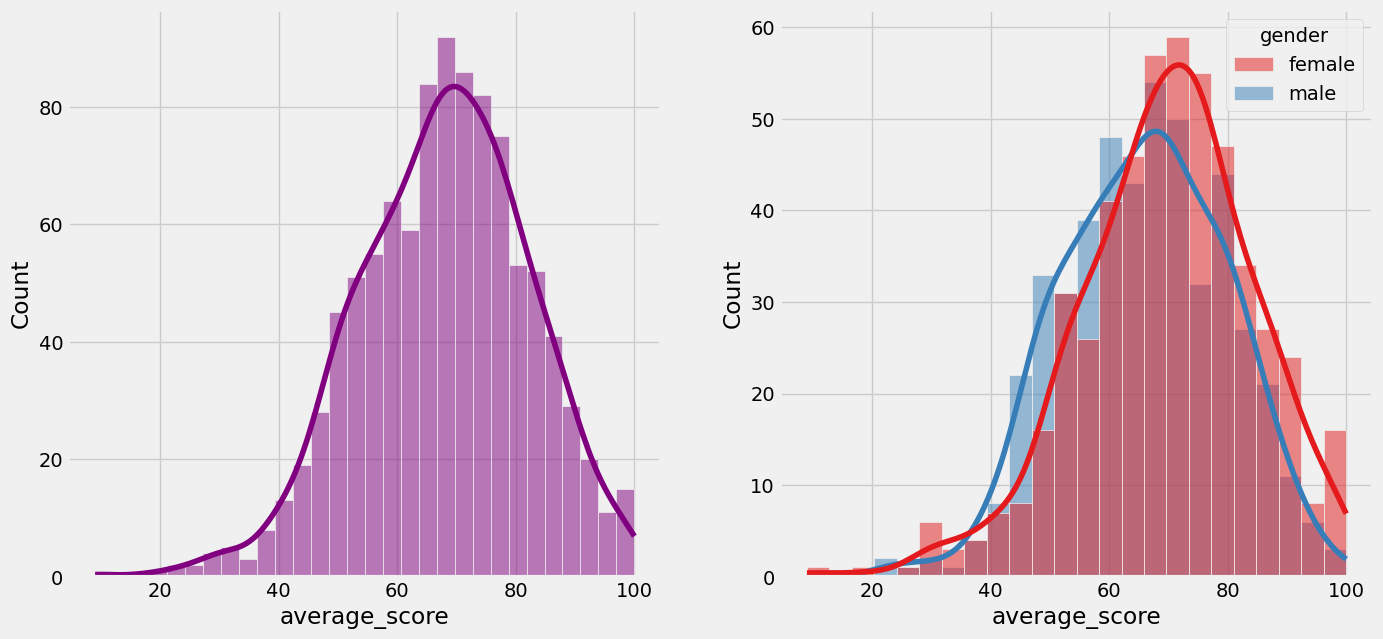

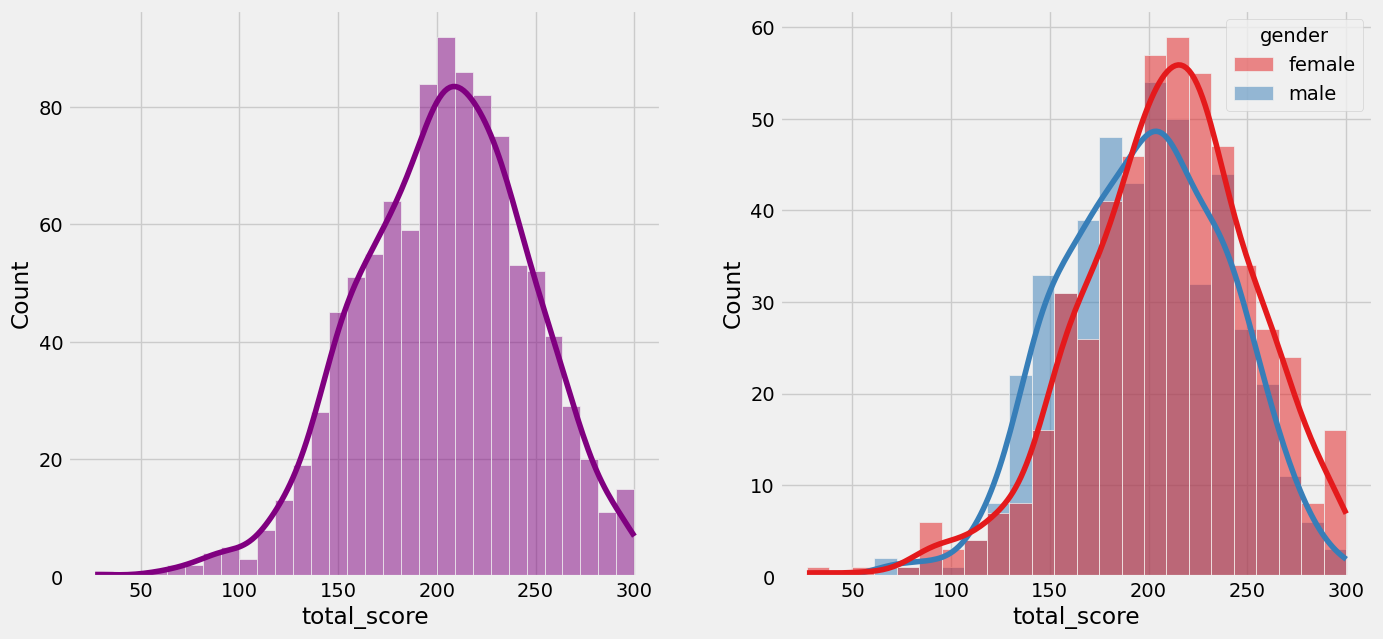

In [46]:
# Histograms & Kernel Density Estimates (KDE)

# Average Score
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(data=student_data, x='average_score', kde=True, bins=30, color='purple')
plt.subplot(1,2,2)
sns.histplot(data=student_data, x='average_score', kde=True, hue='gender', palette='Set1')
plt.show()

# Total Score
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(data=student_data, x='total_score', kde=True, bins=30, color='purple')
plt.subplot(1,2,2)
sns.histplot(data=student_data, x='total_score', kde=True, hue='gender', palette='Set1')
plt.show()

#### 4.2 Average Score Distribution by Lunch Options

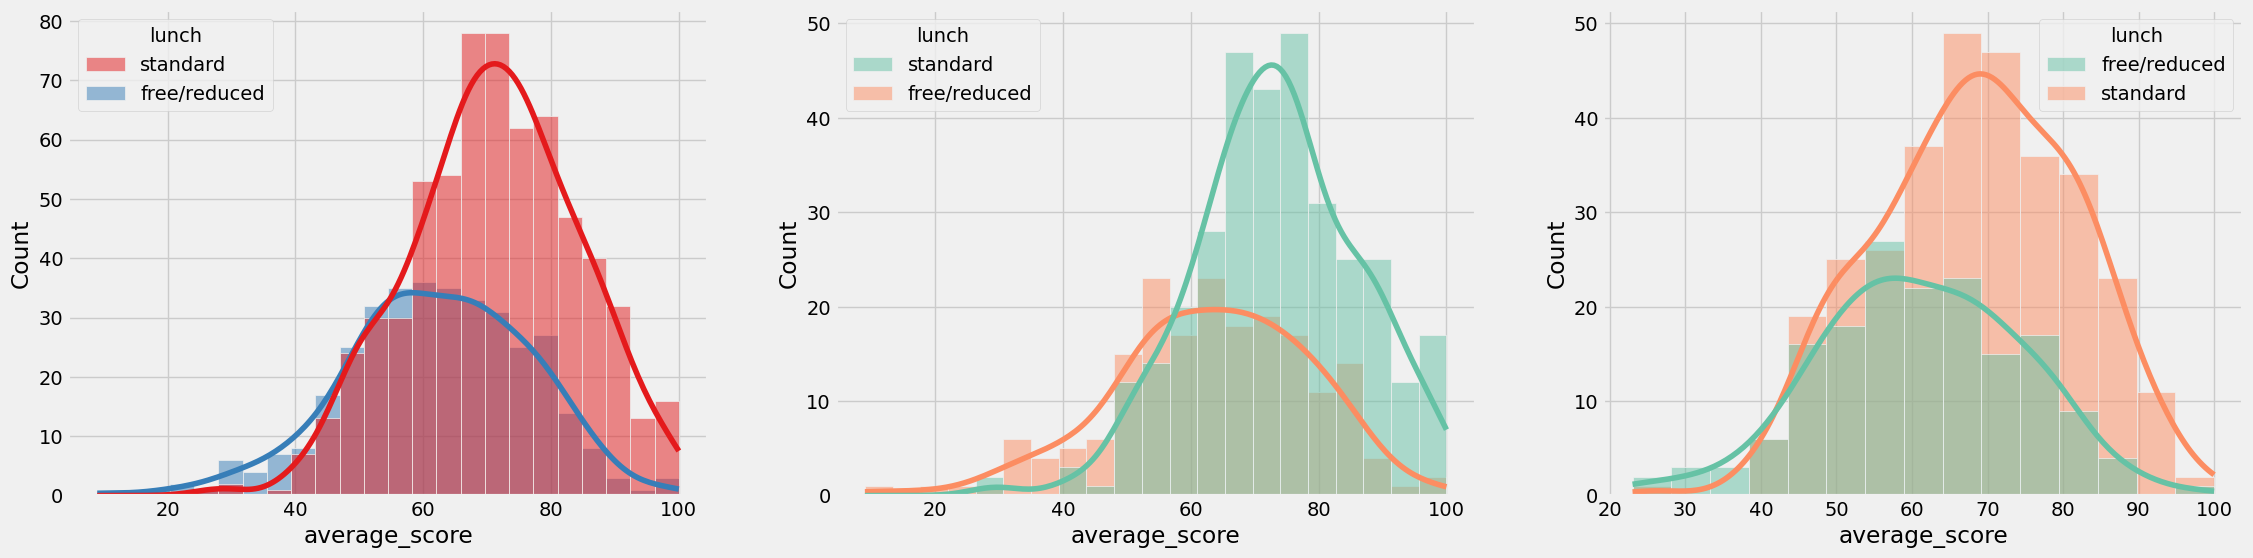

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(1,3,1)
sns.histplot(data=student_data, x='average_score', kde=True, hue='lunch', palette='Set1')
plt.subplot(1,3,2)
sns.histplot(data=student_data[student_data['gender'] == 'female'], x='average_score', kde=True, hue='lunch', palette='Set2')
plt.subplot(1,3,3)
sns.histplot(data=student_data[student_data['gender'] == 'male'], x='average_score', kde=True, hue='lunch', palette='Set2')
plt.show()

#### Insight
- Standard lunch contributes to good performance during exams for both males and females.

#### 4.3 Average Score Distribution by Parents' Education Level

C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\141694168.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental_level_of_education', y='average_score', data=student_data, palette='Set3', order=education_order, ax=axs[0])
C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\141694168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental_level_of_education', y='average_score', data=student_data[student_data['gender'] == 'female'], palette='Set2', order=education_order, ax=axs[1])
C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\141694168.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

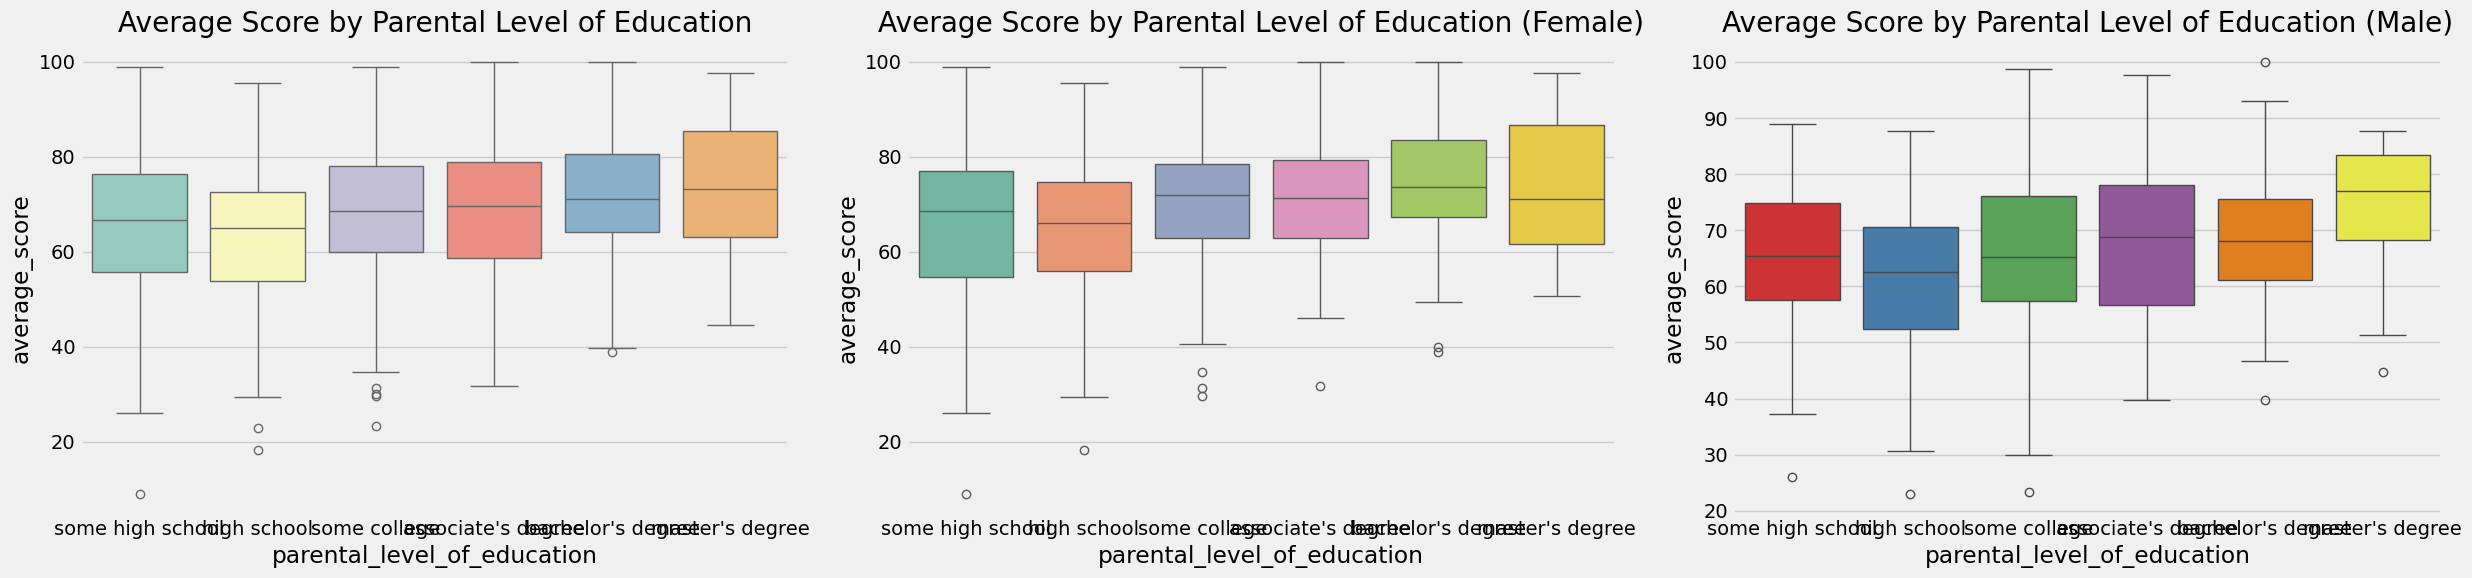

In [48]:
# Order of parental level of education
education_order = ["some high school", 
                   "high school", 
                   "some college", 
                   "associate's degree", 
                   "bachelor's degree", 
                   "master's degree"]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
sns.boxplot(x='parental_level_of_education', y='average_score', data=student_data, palette='Set3', order=education_order, ax=axs[0])
axs[0].set_title('Average Score by Parental Level of Education')

sns.boxplot(x='parental_level_of_education', y='average_score', data=student_data[student_data['gender'] == 'female'], palette='Set2', order=education_order, ax=axs[1])
axs[1].set_title('Average Score by Parental Level of Education (Female)')

sns.boxplot(x='parental_level_of_education', y='average_score', data=student_data[student_data['gender'] == 'male'], palette='Set1', order=education_order, ax=axs[2])
axs[2].set_title('Average Score by Parental Level of Education (Male)')

plt.tight_layout()
plt.show()

#### Insight
- Generally, the highest scores go to students whose parents got either some college degree or associate's degree, while the lowest belong to students with parents attended some high school.

C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\3438074676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race_ethnicity', y='average_score', data=student_data, palette='Set3', ax=axs[0])
C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\3438074676.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race_ethnicity', y='average_score', data=student_data[student_data['gender'] == 'female'], palette='Set2', ax=axs[1])
C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\3438074676.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=

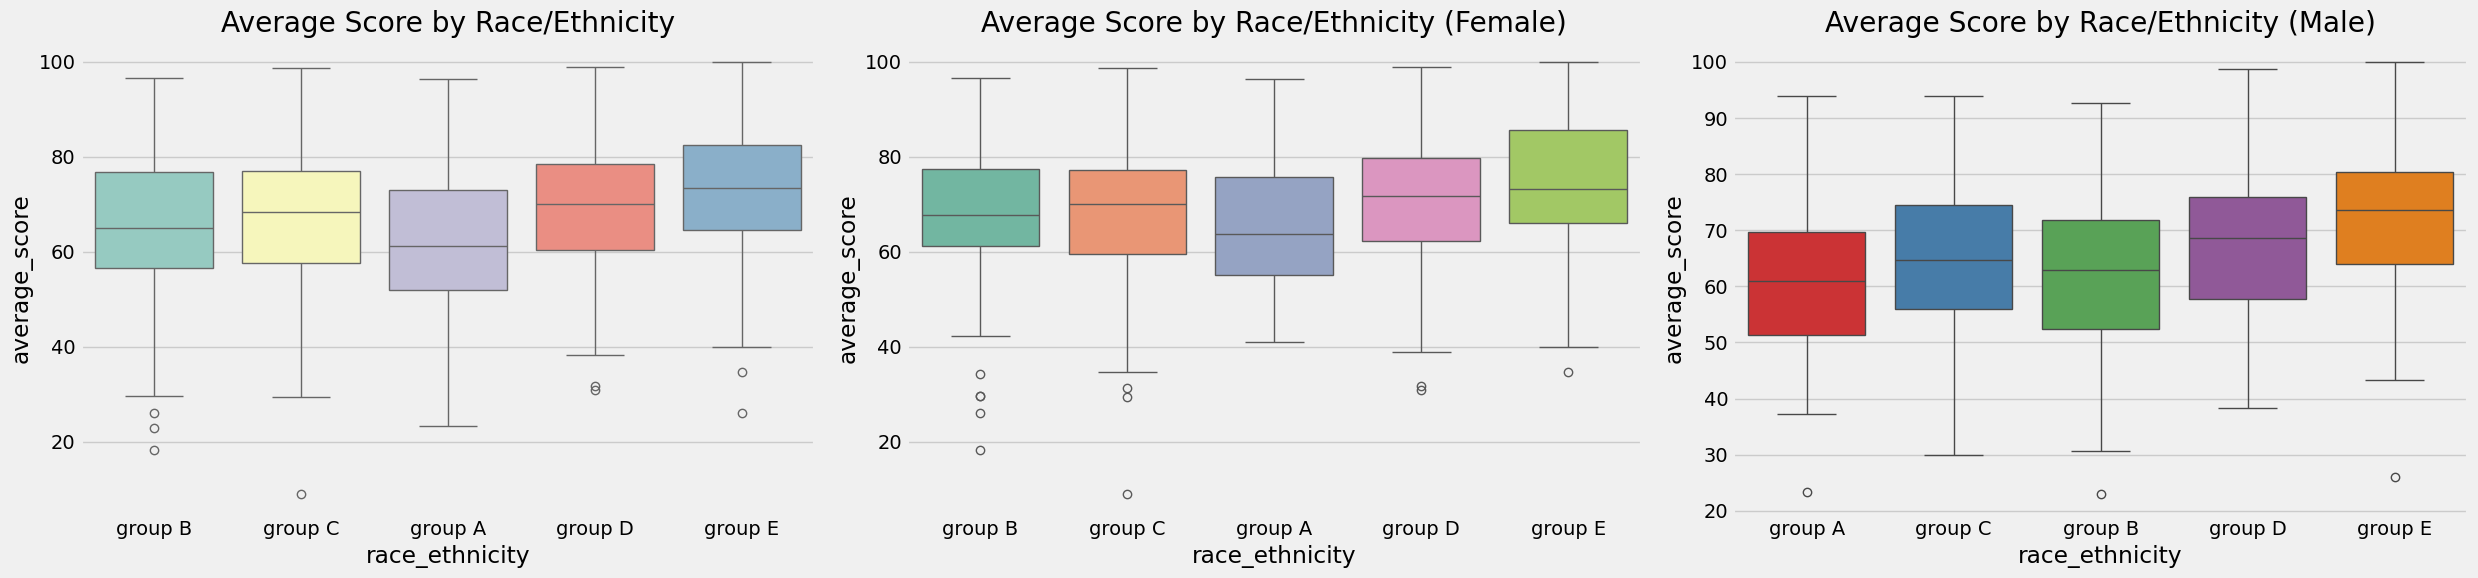

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
sns.boxplot(x='race_ethnicity', y='average_score', data=student_data, palette='Set3', ax=axs[0])
axs[0].set_title('Average Score by Race/Ethnicity')

sns.boxplot(x='race_ethnicity', y='average_score', data=student_data[student_data['gender'] == 'female'], palette='Set2', ax=axs[1])
axs[1].set_title('Average Score by Race/Ethnicity (Female)')

sns.boxplot(x='race_ethnicity', y='average_score', data=student_data[student_data['gender'] == 'male'], palette='Set1', ax=axs[2])
axs[2].set_title('Average Score by Race/Ethnicity (Male)')

plt.tight_layout()
plt.show()

#### Insight
- Students of group B and A tends to perform most poorly on exams, regardless of gender.

#### 4.5 Multivariate analysis using pieplot

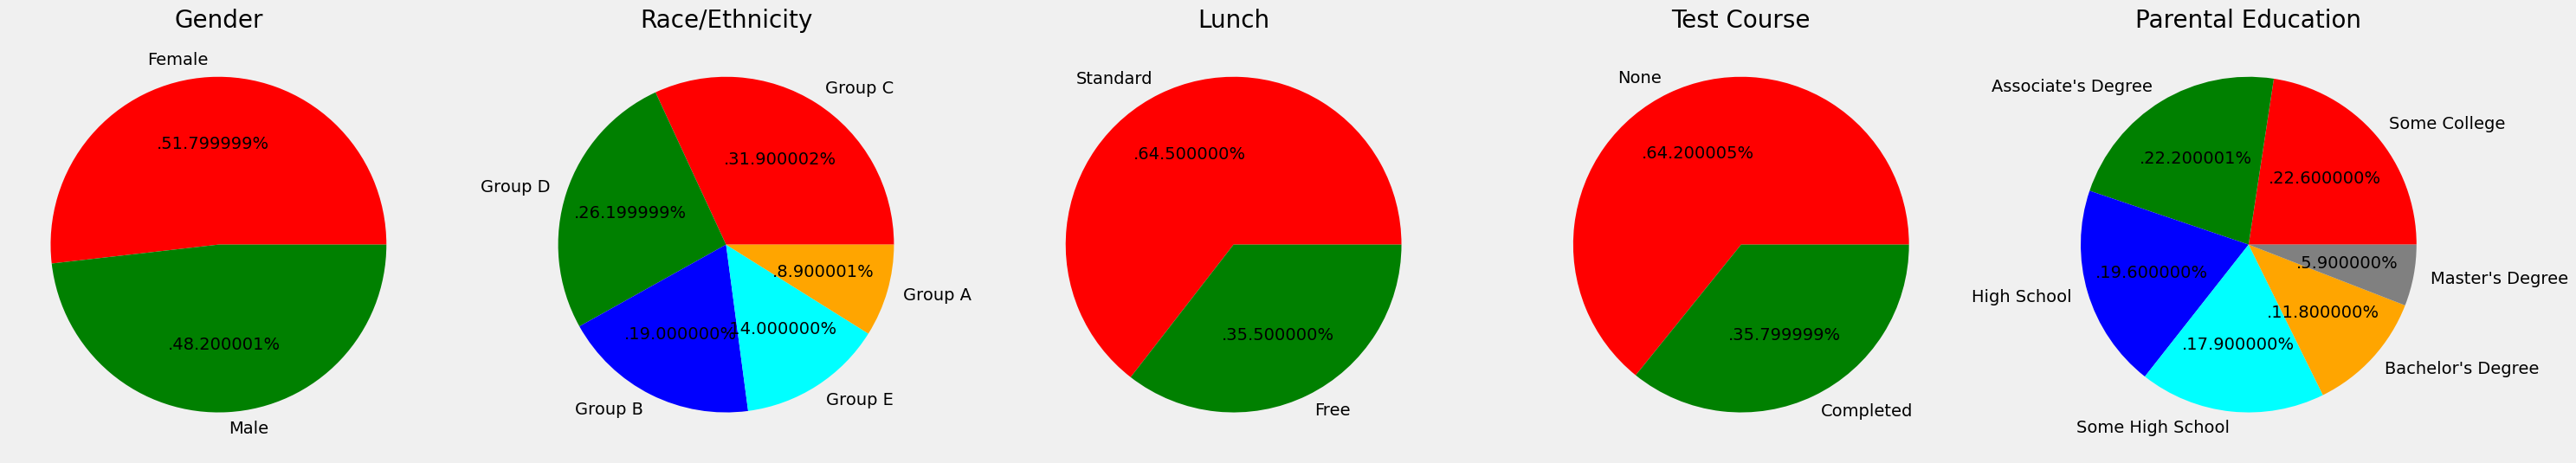

In [50]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = student_data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = student_data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = student_data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = student_data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = student_data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insight
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.6 Feature-wise Visualization

##### 4.6.1 Gender Attribute

C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\3343723389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=student_data['gender'],data=student_data,palette ='bright',ax=ax[0],saturation=0.95)


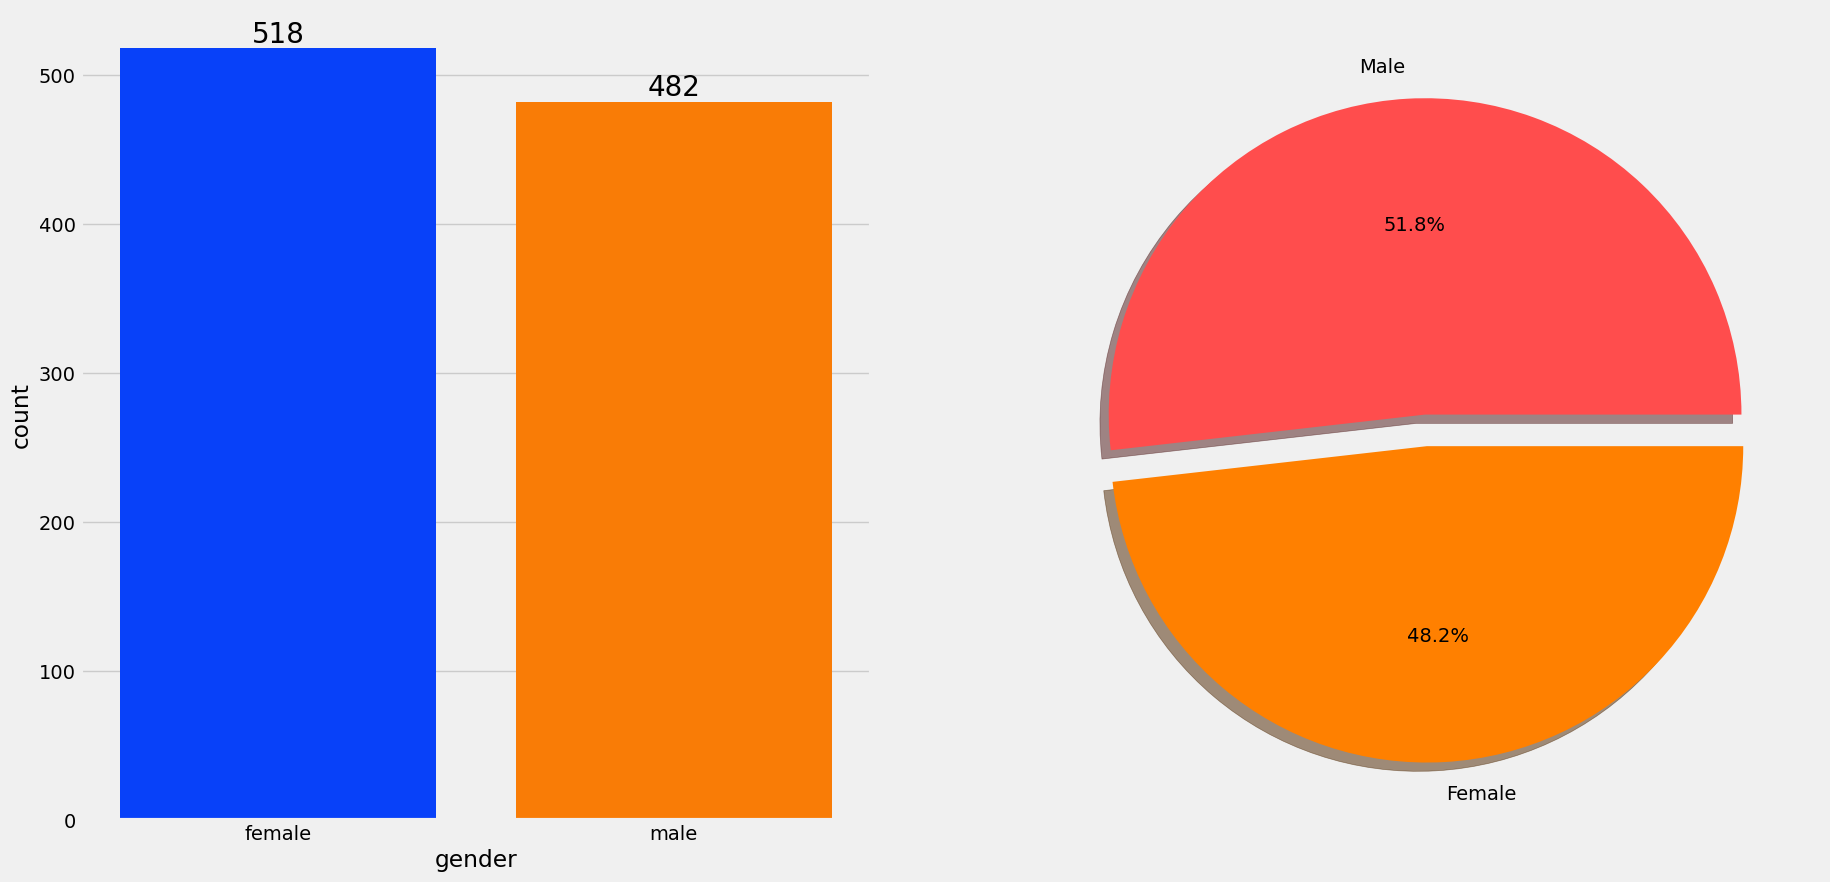

In [51]:
# Univariate Analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=student_data['gender'],data=student_data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=student_data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\2155321233.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\2155321233.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]


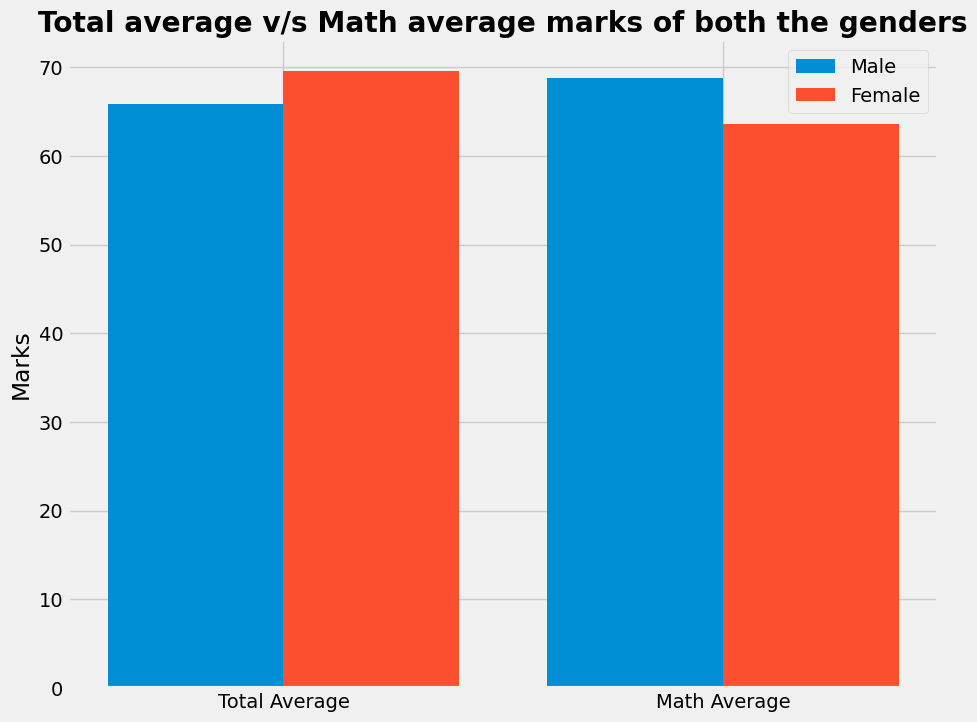

In [52]:
# Bivariate Analysis
gender_group = student_data.groupby('gender').mean(numeric_only=True)
gender_group

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- On an average females have a better overall score than men, whereas the latter have scored higher in Maths.

#### 4.6.2 Race/Ethnicity Attribute

C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\521686336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=student_data['race_ethnicity'],data=student_data,palette = 'bright',ax=ax[0],saturation=0.95)


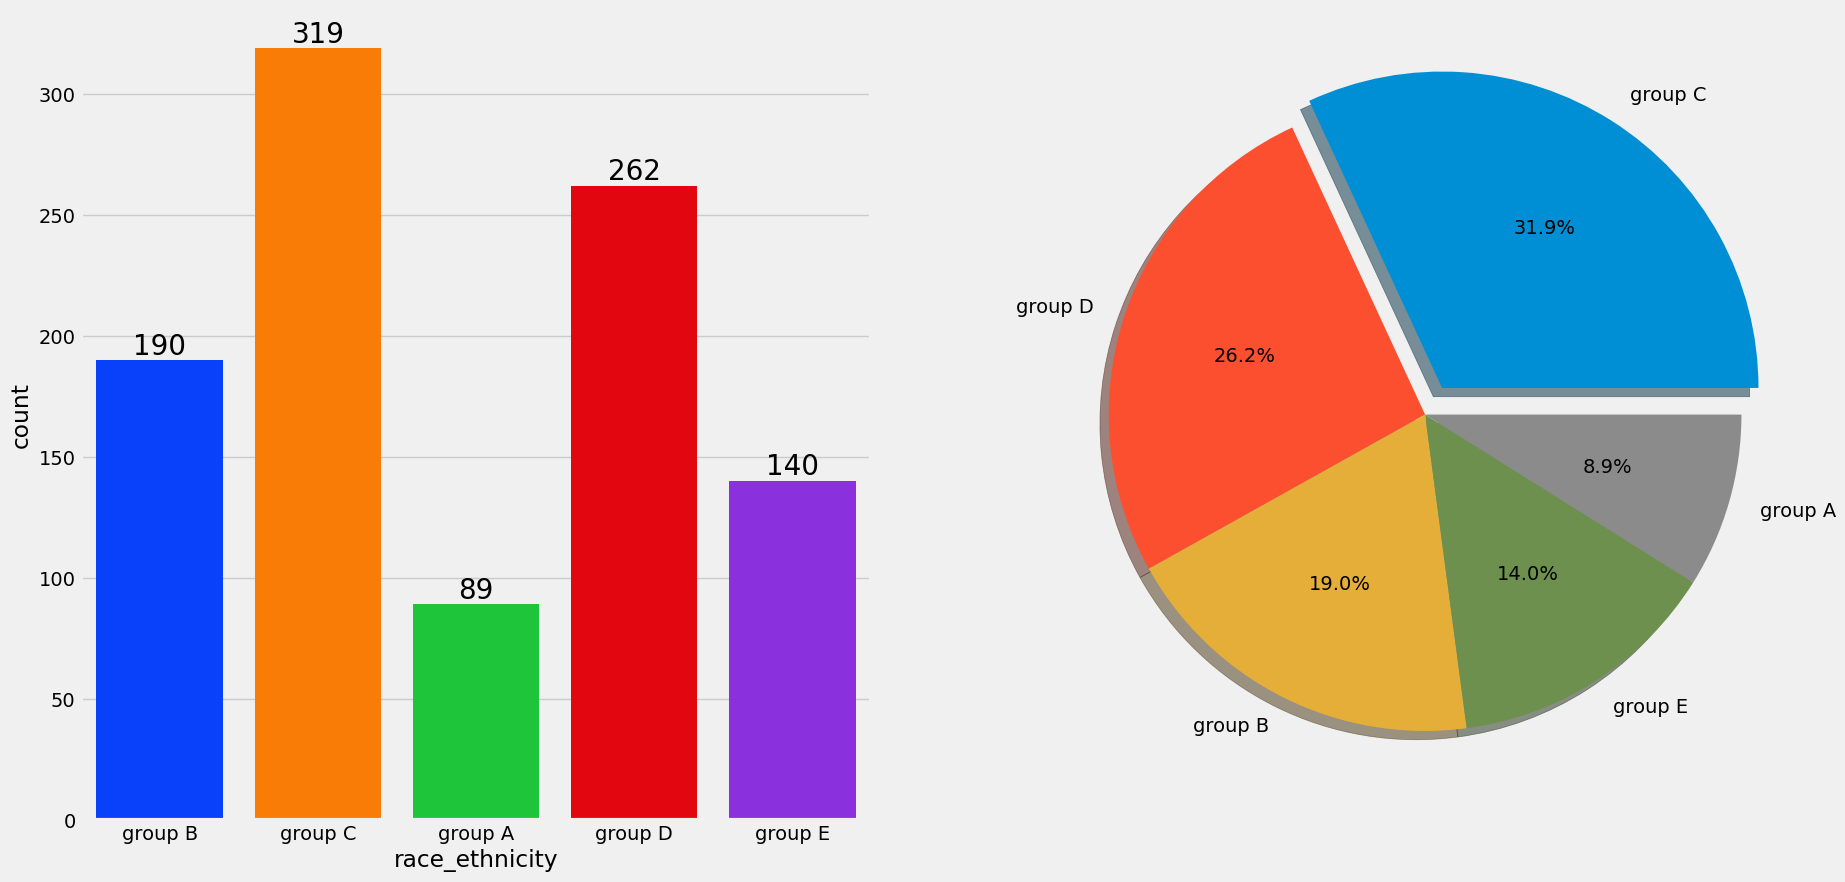

In [53]:
# Univariate Analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=student_data['race_ethnicity'],data=student_data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = student_data['race_ethnicity'].value_counts(),labels=student_data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights
- The student population mostly comprises of those from group C /group D.
- Lowest number of students belong to groupA.

C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\4005323886.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\4005323886.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\4005323886.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

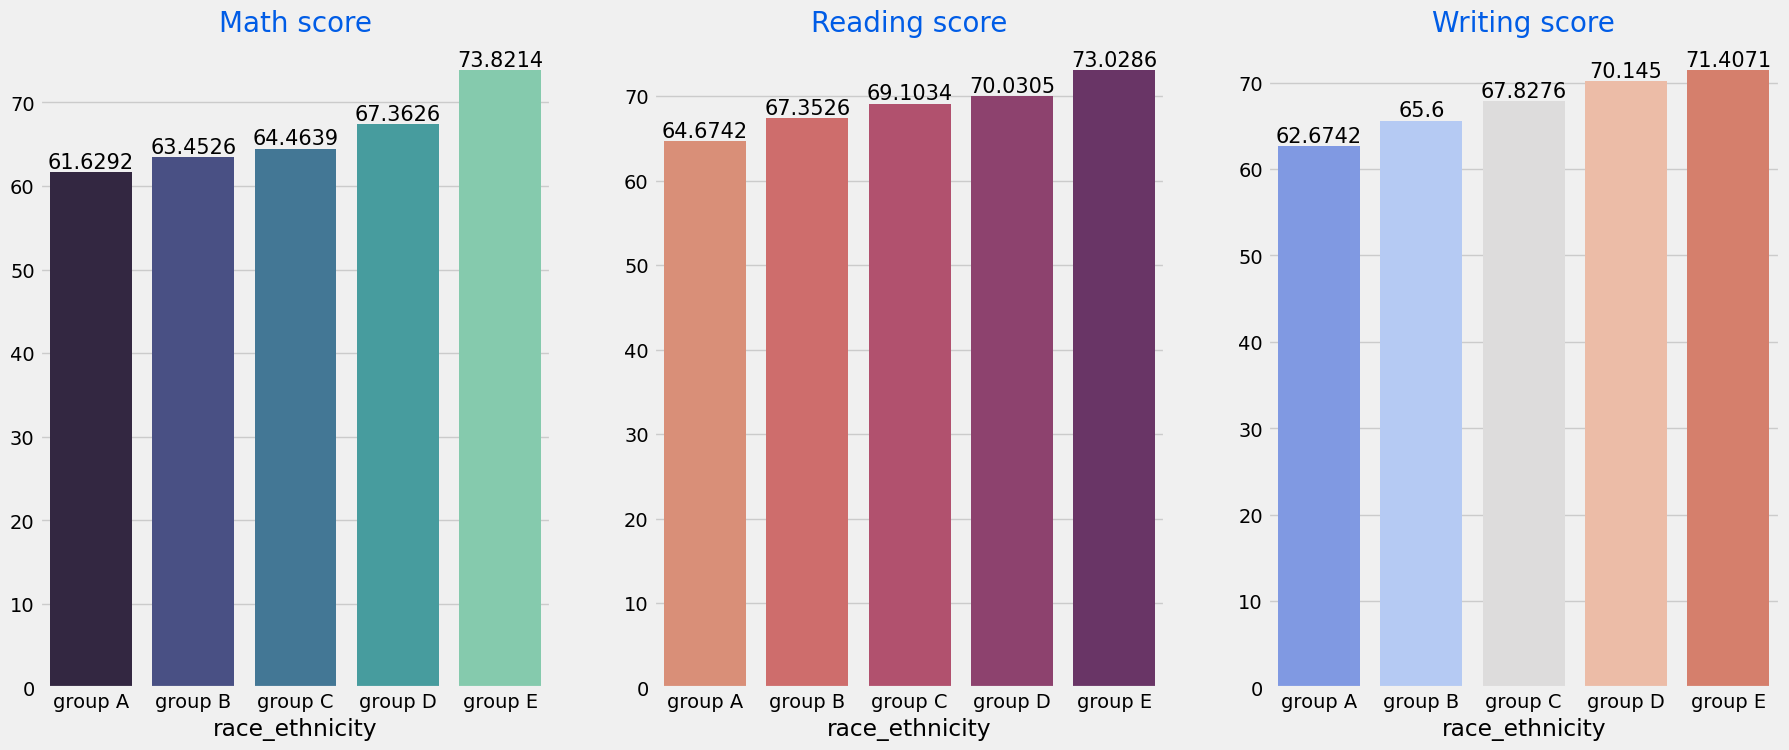

In [54]:
# Bivariate Analysis
Group_data2=student_data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.6.3 Parental Level of Education Attribute

C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\1267554643.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=student_data['parental_level_of_education'], palette = 'Blues')


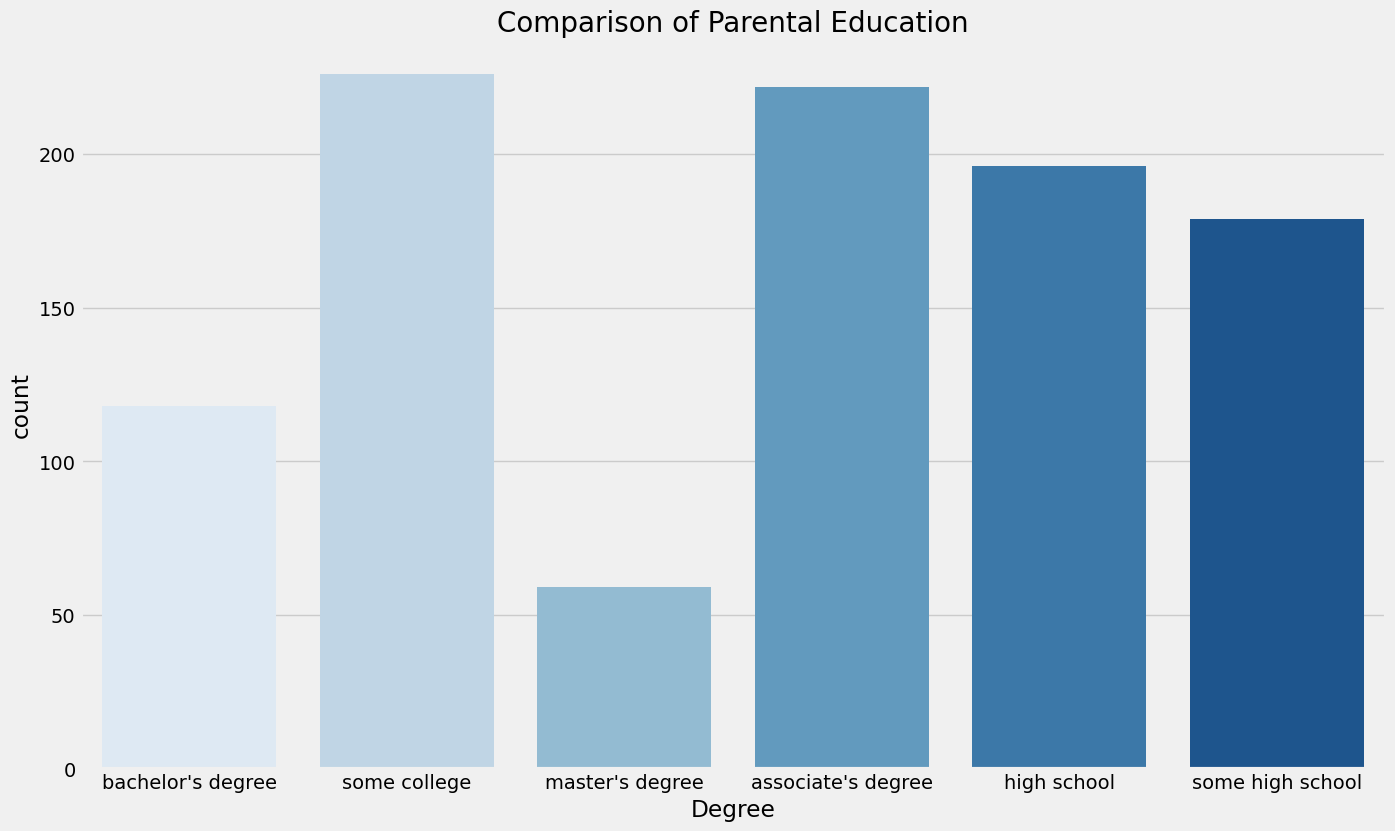

In [55]:
# Univariate Analysis
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=student_data['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

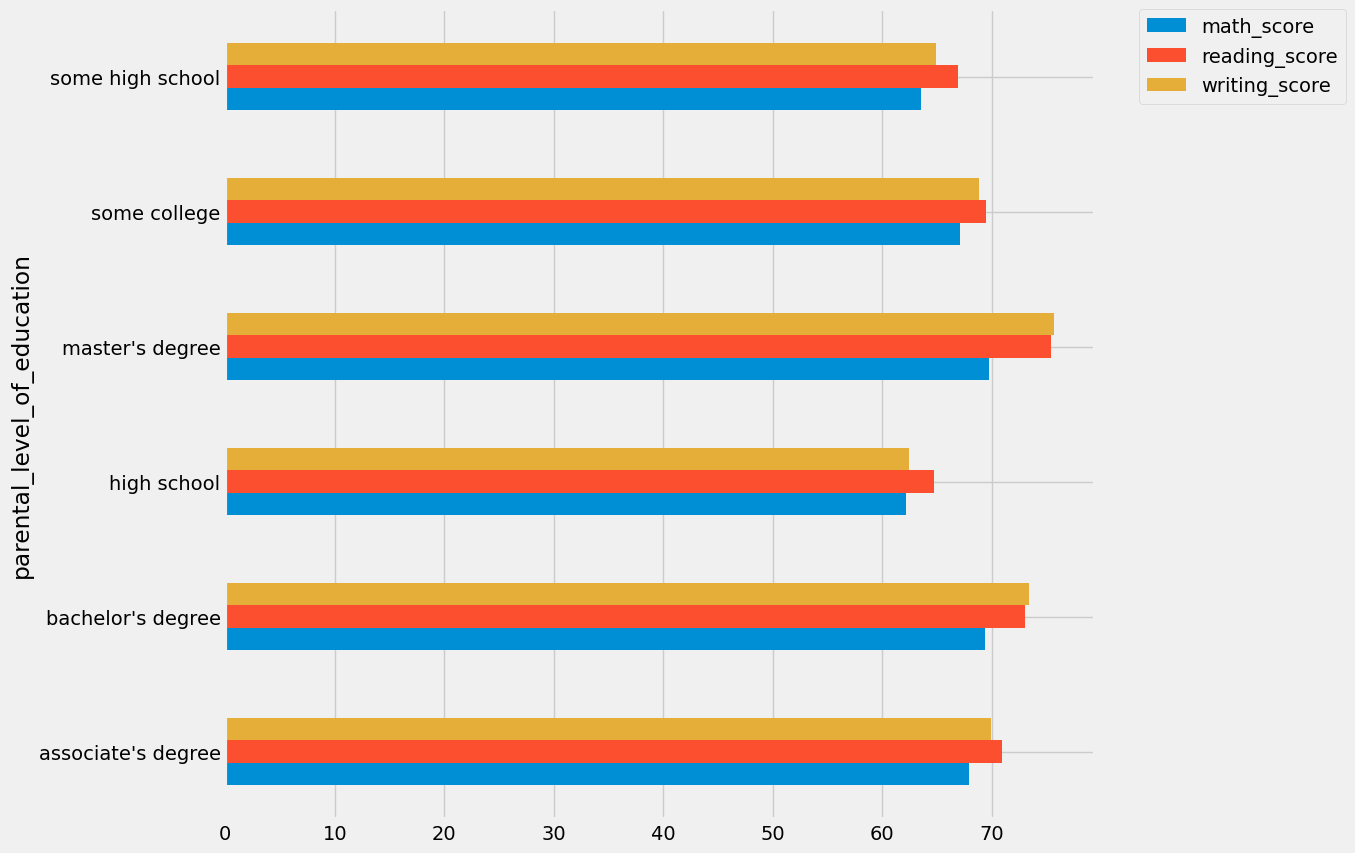

In [56]:
# Bivariate Analysis
student_data.groupby('parental_level_of_education').mean(numeric_only=True).drop(columns=['total_score', 'average_score']).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights ####
- Students whose parents possess master and bachelor level education score higher than others across 3 exams.

#### 4.6.4 Lunch Attribute

C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\554574314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data['lunch'], palette = 'PuBu')


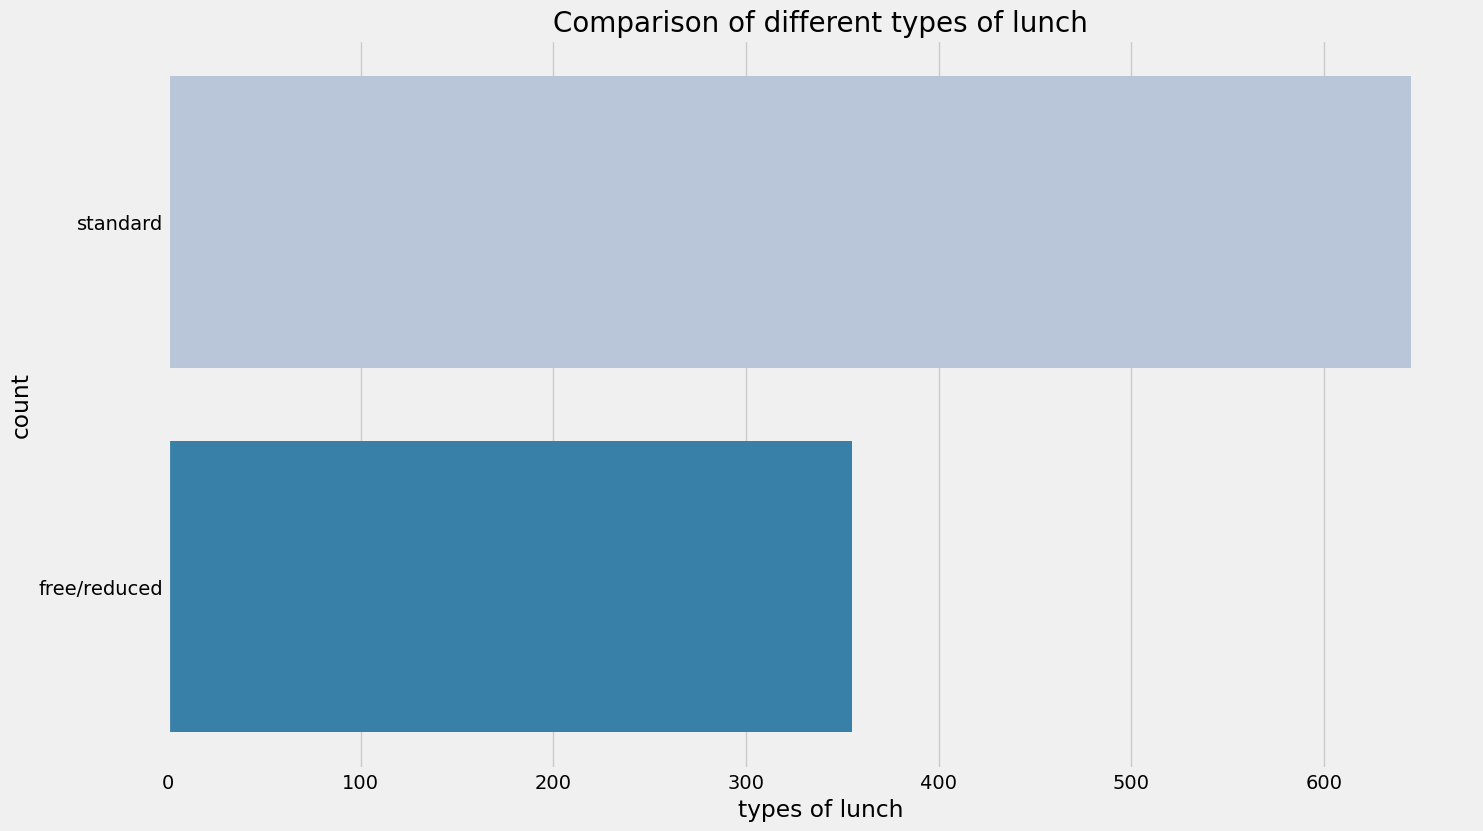

In [57]:
# Unvariate Analysis
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(student_data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

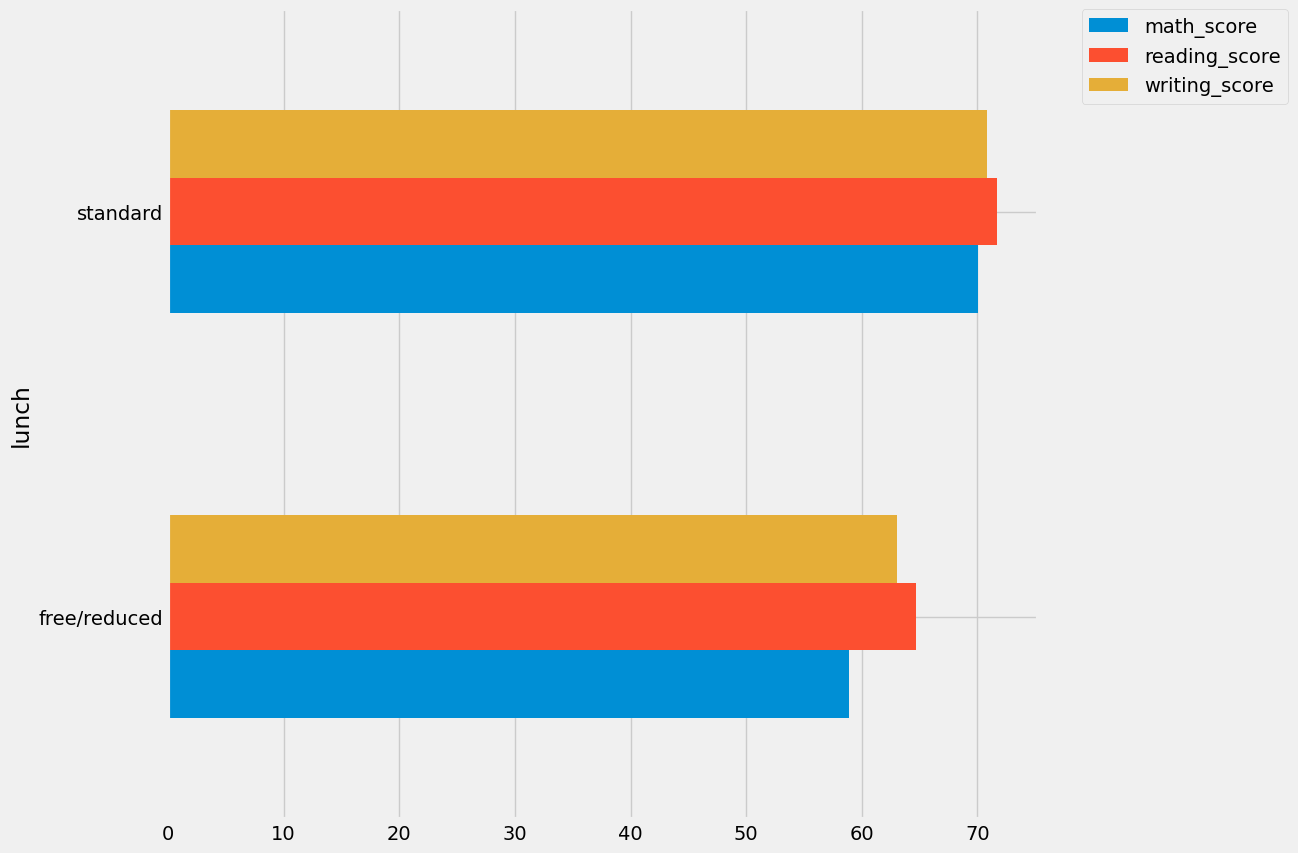

In [58]:
# Bivariate Analysis
student_data.groupby('lunch').mean(numeric_only=True).drop(columns=['total_score', 'average_score']).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights ####
- Students who have standard lunch scored higher than those don't on all of the 3 exams.

#### 4.6.5 Test Preparation Course Attribute

C:\Users\linhk\AppData\Local\Temp\ipykernel_38768\452469059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data['test_preparation_course'], palette = 'PuBu')


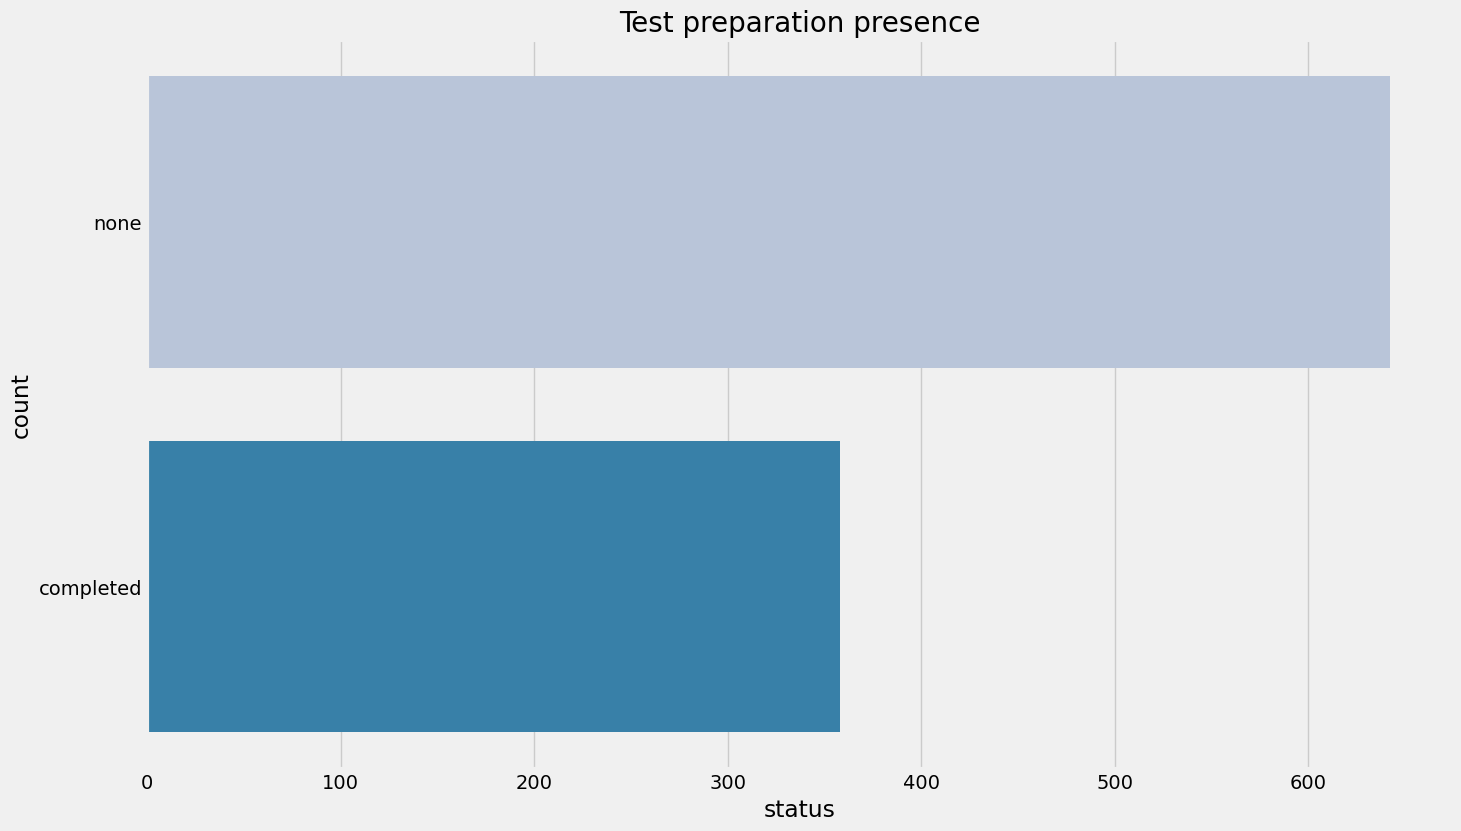

In [59]:
# Unvariate Analysis
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(student_data['test_preparation_course'], palette = 'PuBu')
plt.title('Test preparation presence', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

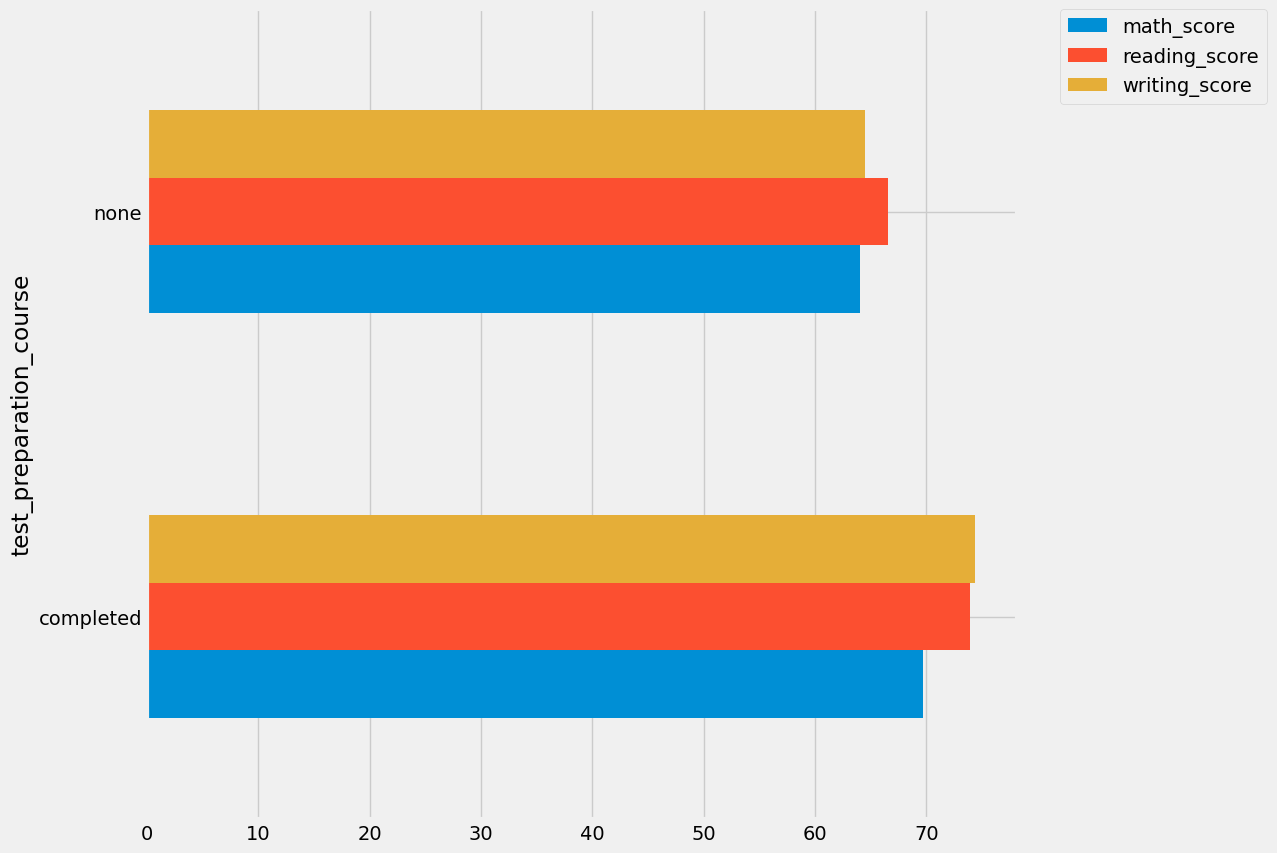

In [60]:
# Bivariate Analysis
student_data.groupby('test_preparation_course').mean(numeric_only=True).drop(columns=['total_score', 'average_score']).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights ####
- Although approximately half of the student population doesn't take the test preparation course, they score higher on all 3 exams
- Interestingly, students who complete the test preparation course show visibly better performance on their writing test

#### 4.7 Checking Outliers

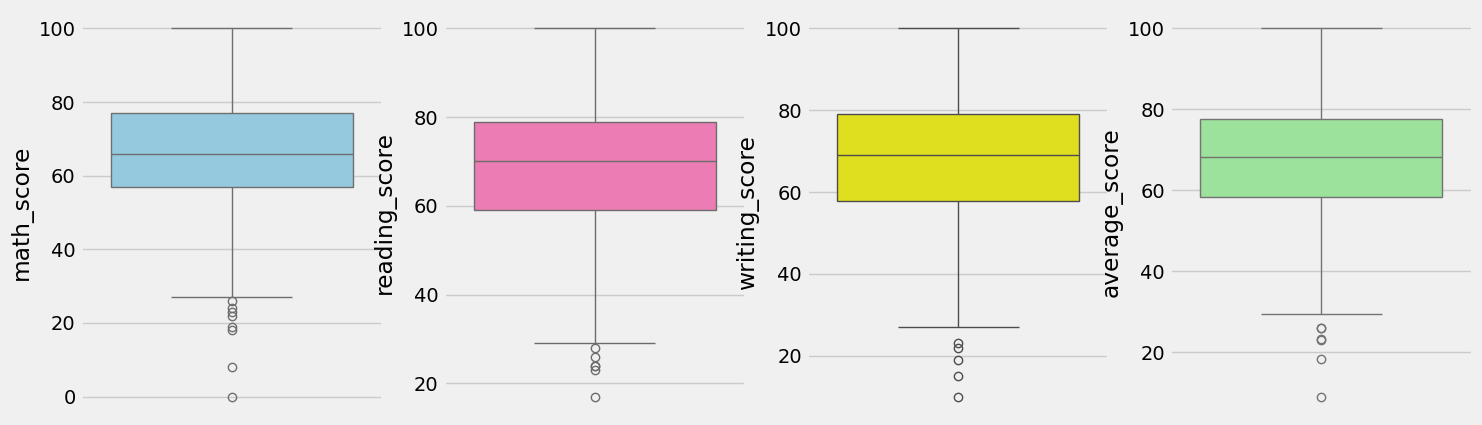

In [61]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(student_data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(student_data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(student_data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(student_data['average_score'],color='lightgreen')
plt.show()

### **5) Conclusion**

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Finishing preparation course is beneficial